In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
aac_intakes = pd.read_csv("aac_intakes.csv")
aac_intakes_outcomes = pd.read_csv("aac_intakes_outcomes.csv")
aac_outcomes = pd.read_csv("aac_outcomes.csv")

Personal note:: Imported all the necessary packages and csv files

In [2]:
aac_intakes["datetime"] = pd.to_datetime(aac_intakes["datetime"])
aac_intakes["datetime2"] = pd.to_datetime(aac_intakes["datetime2"])

Personal note:: Converted the dates into datetime format

## Is there an area where more pets are found?

In [3]:
areas = aac_intakes[aac_intakes.found_location.str.contains(" in ")]
areas = areas.groupby(["found_location"])
print("The areas where more pets are to be found are given below: ")
areas.size().sort_values(ascending = False).head(5)

The areas where more pets are to be found are given below: 


found_location
7201 Levander Loop in Austin (TX)     517
4434 Frontier Trl in Austin (TX)      163
124 W Anderson Ln in Austin (TX)      153
12034 Research Blvd in Austin (TX)     98
1156 W Cesar Chavez in Austin (TX)     98
dtype: int64

Personal note:: At first I've filtered out all the cities, then grouped them by "found_location" and at last sorted out the list by size.

## What is the average number of pets found in a month in the year 2015? Are there months where there is a higher number of animals found?

In [4]:
date_range = aac_intakes[aac_intakes["datetime"] >= pd.Timestamp(2015,1,1)]
date_range = date_range[date_range["datetime"] < pd.Timestamp(2016,1,1)]

average_pets_in_month = ((date_range["animal_id"].count())/12).round(2)
print(f"The average mnumber of pets found in a month in the year 2015 is: {average_pets_in_month}")

The average mnumber of pets found in a month in the year 2015 is: 1559.33


Personal note:: At first calculated the date range (from 2015-01-01 to 2016-01-01). Then claculated the total number of intakes and divided them by 12 to find the average. 

The following graph below shows monthly intakes based on animal ID.
As we can see, there are more intakes in months June, May, August, and October.


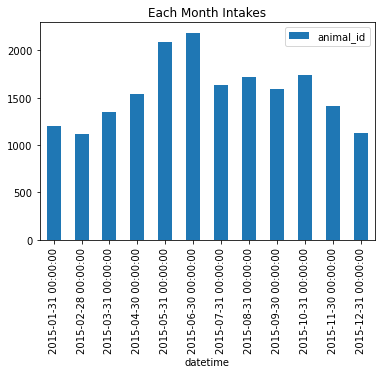

In [5]:
each_month_intakes = date_range.groupby(pd.Grouper(key="datetime", freq="M")).count().plot(kind="bar", title='Each Month Intakes', y="animal_id")
print("The following graph below shows monthly intakes based on animal ID.\nAs we can see, there are more intakes in months June, May, August, and October.")


Personal note:: Months with the most intakes are found by the chart

## What is the ratio of incoming pets vs. adopted pets?

In [6]:
incoming_pets = aac_intakes["animal_id"].count()
adopted_pets = aac_outcomes["animal_id"].count()
ratio = (adopted_pets/incoming_pets).round(4)
print(f"The ratio of incoming pets vs. adopted pets is {ratio}")

The ratio of incoming pets vs. adopted pets is 1.0062


Personal note:: Calculated the number of incoming pets and adopted pets. Then got the ratio by dividing the number of adopted pets by the number of incoming pets.

## What is the distribution of the types of animals in the shelter?

In [7]:
distribution_in_numbers = aac_intakes.groupby(["animal_type"]).size()
distribution_in_numbers

animal_type
Bird           342
Cat          29659
Dog          45743
Livestock        9
Other         4434
dtype: int64

Personal note:: Grouped the animal types together and then printed out the number of each type

## What are the adoption rates for specific breeds?

In [8]:
dogs = aac_intakes[aac_intakes["animal_type"]=="Dog"]
dog_breed = dogs.groupby(["breed"])
dog_breed = dog_breed.size().sort_values(ascending = False)

total_dogs = dog_breed.count()

for i in range(5):
    j = i+1
    breed = dog_breed[i:j] / total_dogs
    print(f'{breed.round(4)}\n')

breed
Pit Bull Mix    3.3153
dtype: float64

breed
Chihuahua Shorthair Mix    2.5247
dtype: float64

breed
Labrador Retriever Mix    2.5148
dtype: float64

breed
German Shepherd Mix    1.0197
dtype: float64

breed
Australian Cattle Dog Mix    0.574
dtype: float64



Personal note:: The code iterates through a list of animal types, which is a list that contains all possible animal types. The code then filters out any animals that are dogs by using .groupby() to group them by their breed. The code uses .size() to get the size of each group, which is how many animals there are in it. Then it sorts these values so they're ordered from smallest to largest.And calculates the percentage of each breed in the total number of dogs.


## What are the adoption rates for different colorings?

In [9]:
color = aac_intakes.groupby(["color"])
color = color.size().sort_values(ascending = False)

total_animals = aac_intakes["color"].count()

for i in range(5):
    j = i+1
    diff_colorings = color[i:j] / total_animals
    print(f'{diff_colorings.round(4)}\n')

color
Black/White    0.104
dtype: float64

color
Black    0.0837
dtype: float64

color
Brown Tabby    0.056
dtype: float64

color
Brown    0.0451
dtype: float64

color
White    0.0355
dtype: float64



Personal note:: The code iterates through a list of colors, which is a list that contains all possible colors. The code then filters out different colors by using .groupby() to group them by their color. The code uses .size() to get the size of each group. And then find the percentage of each color.

## About how many animals are spayed/neutered each month?

In [10]:
spayed_or_neutered = aac_intakes.groupby(["sex_upon_intake"])
spayed_or_neutered.size().sort_values()

sex_upon_intake
Unknown           6813
Spayed Female    11231
Neutered Male    12794
Intact Female    23860
Intact Male      25488
dtype: int64

Personal notes:: printed out the number of animals that are spayed or neutered or intact or unknown.

In [11]:
total = aac_intakes.loc[aac_intakes['sex_upon_intake'] == 'Neutered Male'].count() + aac_intakes.loc[aac_intakes['sex_upon_intake'] == 'Spayed Female'].count()
total_spayed_or_neutered = total['animal_id']

the_first = aac_intakes['datetime'].min()
the_last = aac_intakes['datetime'].max()
total_months = (the_last.year - the_first.year)*12 + the_first.month - the_last.month

number = total_spayed_or_neutered / total_months
print(f"Approximately {number.round(4)} animals are apayed/neutered each month. ")

Approximately 358.5821 animals are apayed/neutered each month. 


Personal note:: Found out the total number of spayed or neutered animals and then calculated the total number of months. And then calculated the approximate number of animal that were spayed or neutered each month by dividing the total number of spayed or neutered animals by the number of total months.